## Linear Regression Overview

In this module, we implement linear regression using the **closed-form solution** (also known as the normal equation) to estimate the probability that a tumor is malignant based on features of its cell nuclei. Although the original task is a binary classification problem (benign vs. malignant), we treat the class labels as continuous values — $0$ for benign and $1$ for malignant — and use linear regression to predict a real-valued score between $0$ and $1$.

The model assumes a linear relationship between the input features $ \mathbf{x} \in \mathbb{R}^d $ and the target value $ y \in \mathbb{R} $, defined as:

$$
\hat{y} = \mathbf{w}^\top \mathbf{x} + b
$$

To find the optimal weights $ \mathbf{w} $ and bias $ b $, we first augment the input matrix with a column of ones to account for the bias term. We then solve for $ \mathbf{w} $ using the normal equation:

$$
\mathbf{w} = (X^\top X)^{-1} X^\top y
$$

We evaluate the model using **mean squared error (MSE)** to see how close the predicted outputs $ \hat{y} $ are to the true labels $ y $. To interpret the results in a classification setting, we apply a threshold at $0.5$ — predictions above this value are labeled malignant ($1$), and those below are labeled benign ($0$).

While this approach can provide a simple baseline, it's important to remember that linear regression isn't ideal for classification tasks, especially when the data isn't linearly separable.

---

## Advantages of Linear Regression

- **Simple and Interpretable**: The model is easy to understand and implement, with clear relationships between inputs and outputs.
- **Closed-Form Solution**: The normal equation provides an exact solution without the need for iterative optimization.
- **Fast to Train**: Especially efficient on smaller datasets due to its analytical solution.
- **Baseline for Comparison**: Serves as a strong benchmark for evaluating more complex models.
- **Works Well with Linearly Related Data**: Performs effectively when the underlying relationship between features and target is linear.

## Disadvantages of Linear Regression

- **Assumes Linearity**: Poor performance if the relationship between features and target is nonlinear.
- **Sensitive to Outliers**: Outliers can heavily influence the model's predictions and skew the results.
- **Not Ideal for Classification**: It predicts continuous values, so thresholding is required for classification tasks, which lacks probabilistic interpretation.
- **No Feature Interactions**: Linear regression can't capture interactions between variables unless explicitly added as new features.
- **Collinearity Issues**: Highly correlated features can destabilize the weight estimates and reduce model reliability.

---

## Data Overview

This module uses the **Breast Cancer Wisconsin (Diagnostic) Dataset** from the UCI Machine Learning Repository. It contains **569 samples**, each describing a breast tumor based on features extracted from a digitized image of a fine needle aspirate (FNA). Each sample includes **30 numeric features** that summarize characteristics of the cell nuclei, such as: **Radius**, **Texture**, **Perimeter**, **Area**, **Smoothness**, etc. These are reported as the **mean**, **standard error**, and **worst** values across the tumor.

The target variable is **diagnosis**:
- **M** = Malignant → encoded as **1**
- **B** = Benign → encoded as **0**

Before training, the dataset was **shuffled**, **split manually** into 80% training and 20% testing sets, and the features were **standardized** using z-score normalization.



In [2]:
# Necessary Imports
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

In [16]:
# Load dataset
data = fetch_ucirepo(id=17)
X = data.data.features.values
y_raw = data.data.targets.values.squeeze()
y = np.where(y_raw == 'M', 1.0, 0.0)  # M = 1, B = 0

# Shuffle and split
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
X, y = X[indices], y[indices]

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [17]:
# Z-score normalization
def zscore(X, mean=None, std=None):
    if mean is None: mean = X.mean(axis=0)
    if std is None: std = X.std(axis=0)
    std[std == 0] = 1
    return (X - mean) / std, mean, std

X_train, mean, std = zscore(X_train)
X_test, _, _ = zscore(X_test, mean, std)

# Fit linear regression using all features
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
w = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predict and evaluate
y_pred_cont = X_test_bias @ w
mse = np.mean((y_test - y_pred_cont) ** 2)
y_pred_class = (y_pred_cont >= 0.5).astype(int)
accuracy = np.mean(y_pred_class == y_test)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Classification Accuracy (threshold = 0.5): {accuracy:.4f}")


Mean Squared Error: 0.0639
Classification Accuracy (threshold = 0.5): 0.9561


In [18]:
# 2D linear regression using first two features
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]
X_train_2d_bias = np.hstack([X_train_2d, np.ones((X_train_2d.shape[0], 1))])
X_test_2d_bias = np.hstack([X_test_2d, np.ones((X_test_2d.shape[0], 1))])
w_2d = np.linalg.pinv(X_train_2d_bias.T @ X_train_2d_bias) @ X_train_2d_bias.T @ y_train

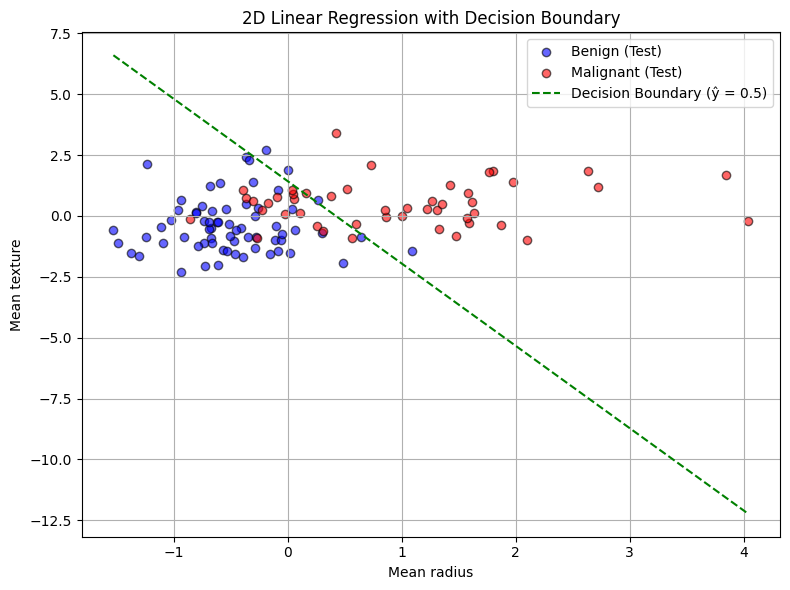

In [22]:
# Plot test data and decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[y_test == 0][:, 0], X_test_2d[y_test == 0][:, 1],
            color='blue', label='Benign (Test)', alpha=0.6, edgecolors='k')
plt.scatter(X_test_2d[y_test == 1][:, 0], X_test_2d[y_test == 1][:, 1],
            color='red', label='Malignant (Test)', alpha=0.6, edgecolors='k')

# Plot regression decision boundary (ŷ = 0.5)
x_vals = np.linspace(X_test_2d[:, 0].min(), X_test_2d[:, 0].max(), 100)
w0, w1, b = w_2d
y_vals = -(w0 / w1) * x_vals - (b - 0.5) / w1
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary (ŷ = 0.5)')

plt.xlabel('Mean radius')
plt.ylabel('Mean texture')
plt.title('2D Linear Regression with Decision Boundary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Discussion: Linear Regression Performance on Breast Cancer Data

The 2D plot above visualizes linear regression applied to the Breast Cancer Wisconsin Diagnostic dataset using the first two standardized features: **mean radius** and **mean texture**. The green dashed line represents the decision boundary where the predicted value $\hat{y} = 0.5$, used to distinguish between malignant and benign tumors.

While the model does capture a rough separation between the two classes, its performance is clearly limited:

- Many **malignant samples (red)** fall on the benign side of the boundary, and vice versa, leading to significant misclassification.
- This is expected, as the underlying class boundary in this dataset is **not linearly separable**, especially when reduced to just two features.
- Linear regression is also not designed for binary classification — it lacks probabilistic interpretation, and thresholding continuous outputs at 0.5 is a crude workaround.

### Why This Dataset Is a Poor Fit

The breast cancer dataset is fundamentally a **classification problem**, where the target labels are categorical. Linear regression is better suited for problems where the target is **continuous** and has a meaningful linear relationship with the input features.

---

## CDC Physical Activity and Obesity Dataset

To further explore the applicability of linear regression, we apply it to the **CDC Nutrition, Physical Activity, and Obesity dataset**, which compiles behavioral health indicators across U.S. states and territories. Collected by the Centers for Disease Control and Prevention (CDC), the dataset is based on responses from the Behavioral Risk Factor Surveillance System (BRFSS), one of the largest ongoing public health surveys in the world.

Each entry in the dataset corresponds to a particular **health indicator** (e.g., obesity rate, physical inactivity, dietary habits), measured as a **percentage of adults** in a given **state or demographic group**. The data is presented in long format, with values linked to questions like:
- “Percent of adults aged 18 years and older who have obesity”
- “Percent of adults who engage in no leisure-time physical activity”
- “Percent of adults who report consuming vegetables less than one time daily”

These indicators are aggregated at the **state level**, and often stratified by **year**, **sex**, **race/ethnicity**, or **income group**.

By pivoting the dataset into wide format, we can examine how different behavioral metrics co-vary. For example, we can investigate the **relationship between physical inactivity and obesity prevalence** using linear regression, treating both as continuous variables.

- This use case highlights **how public health variables relate to one another** spatially and demographically.
- Because the data is observational and aggregated, the goal is not causal inference but rather to identify **general trends** or **predictive associations**.

Overall, this dataset offers a valuable opportunity to apply linear regression in a real-world, population-level health context—where interpretability, trend analysis, and simplicity are crucial.



In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Filter and pivot
df_subset = df[['LocationDesc', 'Question', 'Data_Value']].dropna()
df_wide = df_subset.pivot_table(index='LocationDesc', columns='Question', values='Data_Value')

# Confirm exact column names
for col in df_wide.columns:
    print(col)

Percent of adults aged 18 years and older who have an overweight classification
Percent of adults aged 18 years and older who have obesity
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
Percent of adults who engage in no leisure-time physical activity
Percent of adults who report consuming fruit less than one time d

In [72]:
# Assign columns
x_col = 'Percent of adults who engage in no leisure-time physical activity'
y_col = 'Percent of adults aged 18 years and older who have obesity'

# Extract X and y
df_plot = df_wide[[x_col, y_col]].dropna()
X = df_plot[x_col].values.reshape(-1, 1)
y = df_plot[y_col].values

# Add bias and solve normal equation
X_bias = np.hstack([X, np.ones((X.shape[0], 1))])
w = np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y
y_pred = X_bias @ w

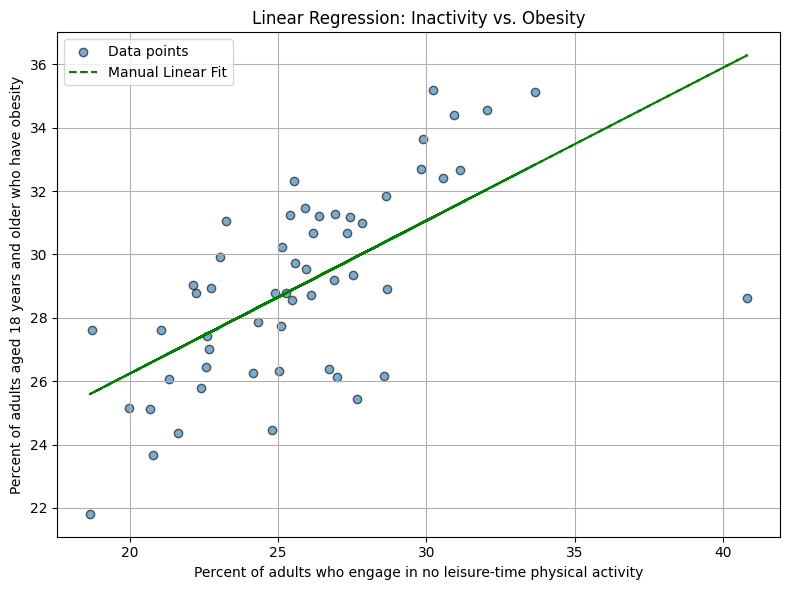

In [74]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='k', label='Data points')
plt.plot(X, y_pred, color='green', linestyle='--', label='Manual Linear Fit')

plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Linear Regression: Inactivity vs. Obesity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
